In [ ]:
!pip3 install scikit-learn==0.21.2

     |████████████████████████████████| 6.7MB 5.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
#connection drive
from google.colab import drive
drive.mount('/content/drive')
!pip3 install TurkishStemmer

Mounted at /content/drive


In [2]:
%tensorflow_version 2.4
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.4`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
Tensorflow version 2.4.1
Running on TPU  ['10.44.159.146:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.44.159.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.44.159.146:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
from myfiles.utils import utils

In [4]:
X,y = utils.getXyData()

hello
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
init


In [5]:
def getEmbeddings(word_index):
    
  glove_dir = '/content/drive/MyDrive/lstmWorks/vectors.txt'
  word2vec_dir = '/content/drive/MyDrive/Word2Vec/trmodel'

  gloveEmbedMatrix = utils.makeEmbeddingMatrix(300,'glove', glove_dir ,word_index )
  word2vecEmbedMatrix = utils.makeEmbeddingMatrix(400, 'word2vec', word2vec_dir, word_index)
  return gloveEmbedMatrix, word2vecEmbedMatrix


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
# import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
!pip3 install h5py

In [7]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
import numpy as np 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

def createTokenizer(trainSequences, testSequences, y_train, y_test):
    maxlen = 100     # max number of words in a comment to use
    tokenizer = Tokenizer(num_words = 25000)   #most max words
    tokenizer.fit_on_texts(trainSequences)   #kelimeleri fit'liyoruz.

    x_train = tokenizer.texts_to_sequences(trainSequences)
    x_test = tokenizer.texts_to_sequences(testSequences)

    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))

    x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
    x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)

    print('Shape of data tensor:', y_train.shape)
    print('Shape of label tensor:', y_test.shape) 
    
    # return [x_train, y_train], word_index
    return [x_train, x_test,y_train, y_test], word_index


In [ ]:
from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [8]:
def makeNewModelWithCheckPoint(lstmLayer,denseLayer,embedding_matrix,total_words):

    # from keras.models import Sequential
    # from keras.layers import LSTM, Dense, Dropout, Masking, Embedding,Bidirectional
    # from keras.callbacks import ModelCheckpoint, EarlyStopping
    # from keras.utils.vis_utils import plot_model

    import sys, os, re, csv, codecs, numpy as np, pandas as pd

    from keras.preprocessing.text import Tokenizer
    from keras.preprocessing.sequence import pad_sequences
    from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
    from keras.layers import Bidirectional, GlobalMaxPool1D
    from keras.models import Model
    from keras import initializers, regularizers, constraints, optimizers, layers

    # glove_matrix , word2vec_matrix  = getEmbeddings(word_index)


    inp = Input(shape=(100,))
    if embedding_matrix.shape[1] == 300:
        x = Embedding(25000, 300, weights=[embedding_matrix])(inp)
    elif embedding_matrix.shape[1] == 400:
        x = Embedding(25000, 400, weights=[embedding_matrix])(inp)


    x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x)

    x = Dense(64, activation="relu")(x)
    x = Dropout(0.25)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model 

>Train: 0=11903, 1=175795, Test: 0=2976, 1=43949
>Train: 0=11903, 1=175795, Test: 0=2976, 1=43949
>Train: 0=11903, 1=175795, Test: 0=2976, 1=43949
>Train: 0=11903, 1=175796, Test: 0=2976, 1=43948
>Train: 0=11904, 1=175795, Test: 0=2975, 1=43949
Found 89548 unique tokens.
Shape of data tensor: (187698,)
Shape of label tensor: (46925,)
Embeddings Matrix shape :  (25000, 300)
Embeddings Matrix shape :  (25000, 400)
89549
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 400)          10000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 128)          238080    
_________________________________________________________________
dense (Dense)                (None,

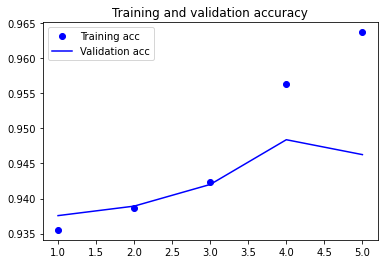

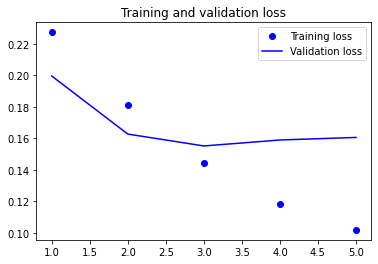

Found 89828 unique tokens.
Shape of data tensor: (187698,)
Shape of label tensor: (46925,)
Embeddings Matrix shape :  (25000, 300)
Embeddings Matrix shape :  (25000, 400)
89829
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 400)          10000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 128)          238080    
_________________________________________________________________
dense_2 (Dense)              (None, 100, 64)           8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
dense_3 (Dense

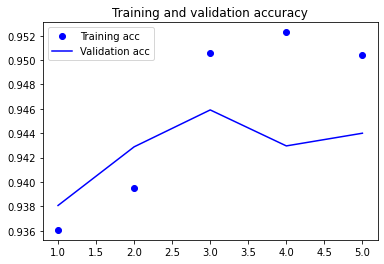

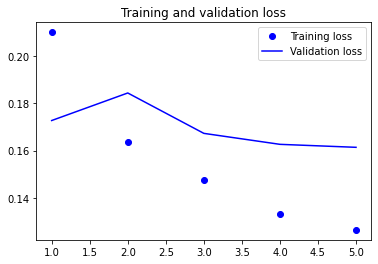

Found 89574 unique tokens.
Shape of data tensor: (187698,)
Shape of label tensor: (46925,)
Embeddings Matrix shape :  (25000, 300)
Embeddings Matrix shape :  (25000, 400)
89575
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 400)          10000000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 128)          238080    
_________________________________________________________________
dense_4 (Dense)              (None, 100, 64)           8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
dense_5 (Dense

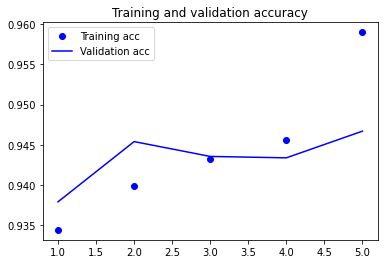

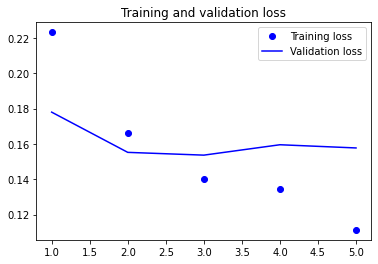

Found 89823 unique tokens.
Shape of data tensor: (187699,)
Shape of label tensor: (46924,)
Embeddings Matrix shape :  (25000, 300)
Embeddings Matrix shape :  (25000, 400)
89824
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 400)          10000000  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 128)          238080    
_________________________________________________________________
dense_6 (Dense)              (None, 100, 64)           8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
dense_7 (Dense

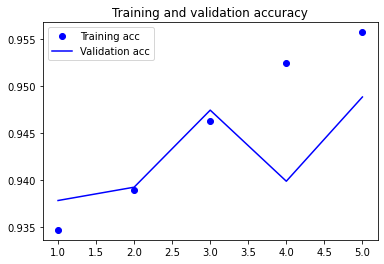

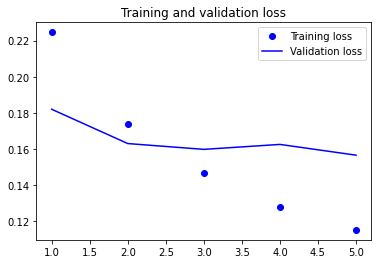

Found 89983 unique tokens.
Shape of data tensor: (187699,)
Shape of label tensor: (46924,)
Embeddings Matrix shape :  (25000, 300)
Embeddings Matrix shape :  (25000, 400)
89984
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 100, 400)          10000000  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 128)          238080    
_________________________________________________________________
dense_8 (Dense)              (None, 100, 64)           8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
dense_9 (Dense

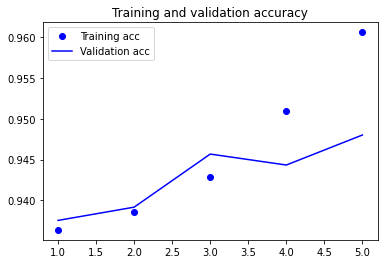

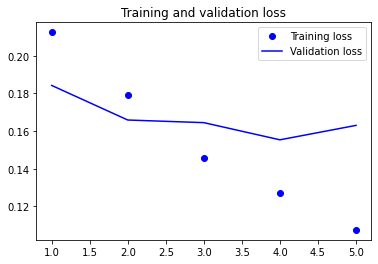

In [9]:
# gridSearch works...
maxlen=100
a = utils.splitKFoldStratified(X,y)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

with tpu_strategy.scope():
    for i in range(5):
        x_train = a[0][i]
        x_test = a[1][i]
        y_train = a[2][i]
        y_test = a[3][i]

        element, word_index = createTokenizer(x_train, x_test, y_train, y_test)
        
        sendParam = train_test_split(element[0], element[2], test_size=0.30, random_state=42, stratify=element[2] ) 

        
        # element, word_index = createTokenizer(X, x_test, y, y_test)
        glove_matrix , word2vec_matrix  = getEmbeddings(word_index)
        total_words = len(word_index) + 1
        print(total_words) 
        model = makeNewModelWithCheckPoint(1,1,word2vec_matrix,total_words)
        history = model.fit(sendParam[0], sendParam[2], batch_size=256, epochs=5, validation_data=(sendParam[1],sendParam[3])) 

        print(model.evaluate(element[1], element[3]))
        utils.vizualize_loss_acc(history)
        # utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# xtrain,xtest,ytrain,ytest

  

In [ ]:

# with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU

    # Parameter grid for grid search
    # param_grid = dict( lstmLayer = [10,32,64,128],
    #                     denseLayer=[32,64],
    #                     total_words=[total_words],
    #                     embedding_matrix=[glove_matrix])

    # model = KerasClassifier(build_fn = makeNewModelWithCheckPoint,
    #                         epochs=10, batch_size=256,
    #                         verbose=True)

    # cross_val = StratifiedKFold(n_splits=5)
    

    # grid = GridSearchCV(
    #                       estimator=model, param_grid=param_grid,
    #                       return_train_score=True,
    #                       n_jobs=1, 
    #                       scoring=['accuracy'],
    #                      refit='accuracy', cv=cross_val
    #                     )
    
    # grid.fit(element[0], element[1])
    # # summarize results
    # print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
    # print('***************************')

    # # print('Test Score for Optimized Parameters:', grid.score(x_test, y_test))


In [ ]:
!pip3 install tensorflow~=2.2.0 tensorflow_gcs_config~=2.2.0
import tensorflow as tf
import requests
import os
resp = requests.post("http://{}:8475/requestversion/{}".format(os.environ["COLAB_TPU_ADDR"].split(":")[0], tf.__version__))
if resp.status_code != 200:
  print("Failed to switch the TPU to TF {}".format(version))

In [ ]:
# gridSearch works...
# maxlen=100
# a = utils.splitKFoldStratified(X,y)

# from sklearn.model_selection import train_test_split, StratifiedKFold
# # for i in range(5):
# x_train = a[0][0]
# x_test = a[1][0]
# y_train = a[2][0]
# y_test = a[3][0]

# element, word_index = createTokenizer(X, x_test, y, y_test)

# total_words = len(word_index) + 1
# print(total_words) 
# # xtrain,xtest,ytrain,ytest
# # sendParam = train_test_split(element[0], element[2], test_size=0.20, random_state=42, stratify=element[2] )

# with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU

#     # Parameter grid for grid search
#     param_grid = dict( lstmLayer = [32,64,128],
#                         denseLayer=[32,64],
#                         total_words=[total_words],
#                         embedding_matrix=[glove_matrix])

#     model = KerasClassifier(build_fn = makeNewModelWithCheckPoint,
#                             epochs=10, batch_size=256,
#                             verbose=True)

#     cross_val = StratifiedKFold(n_splits=5)
    

#     grid = GridSearchCV(
#                           estimator=model, param_grid=param_grid,
#                           return_train_score=True,
#                           n_jobs=1, 
#                           scoring=['accuracy'],
#                          refit='accuracy', cv=cross_val
#                         )
    
#     grid.fit(element[0], element[1])
#     # summarize results
#     print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
#     print('***************************')

#     # print('Test Score for Optimized Parameters:', grid.score(x_test, y_test))

  

In [ ]:
# en uygun modeli bulmak için uyguladığım fonk.
# def _makeNewModelWithCheckPoint(lstmLayer,denseLayer,embedding_matrix,total_words):

#     from keras.models import Sequential
#     from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
#     from keras.callbacks import ModelCheckpoint, EarlyStopping
#     from keras.utils.vis_utils import plot_model
#     # glove_matrix , word2vec_matrix  = getEmbeddings(word_index)


#     model = Sequential()
#     model.add(Embedding(input_dim = total_words, # number of input  
#                         input_length=100, 
#                         weights=[embedding_matrix],
#                         output_dim=300 , trainable=False, mask_zero=True))
#     # Masking layer for pre-trained embeddings
#     model.add(Masking(mask_value=0.0))


#     # Recurrent layer
#     model.add(LSTM(lstmLayer, return_sequences=False, 
#                    dropout=0.1, recurrent_dropout=0.1))

#     # Fully connected layer
#     model.add(Dense(denseLayer, activation='relu'))  #32 neurons

#     # Dropout for regularization
#     model.add(Dropout(0.25))

#     # Output layer
#     model.add(Dense(1, activation='sigmoid'))

#     import keras
#     model.summary()


#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     # simple early stopping
#     # es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#     # mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
#     return model 


#     # history = model.fit(param[0], param[1],
#     #                         epochs=20,
#     #                         validation_data=(val[0],val[1]),
#     #                         batch_size=512,
#     #                         verbose=1, 
#     #                         callbacks=[es, mc])

#     # print("*********************test***********************")
#     # print(model.evaluate(x_test, y_test))
#     # print("---------------------vizualize---------------------")
#     # vizualize_loss_acc(history)
#     # plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)